# The code explains the insights in Sales idl data by giving different data visualization plots

## importing nescessary libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## importing the 'SalesDTL.csv' file into pandas dataframe and datapreprocessing , the data is sliced from 6th March 2016 beause

In [31]:
cols=['SHDR_IDL','PROD_IDL','PRTYPE_IDL','RPRICE','QUANTITY','DATEORDER']
dtl=pd.read_csv("SalesDTL.csv",usecols=cols,parse_dates=['DATEORDER'],
                dtype={'SHDR_IDL':int,'PROD_IDL':int,'PRTYPE_IDL':int,'QUANTITY':int})

#converting column names to lower case
dtl.columns=dtl.columns.str.lower()

dtl=dtl.set_index("dateorder")
dtl['rprice']=dtl['rprice'].abs()
dtl['total_price']=dtl['rprice']*dtl['quantity']
dtl=dtl.loc['2016-03-06':,]
dtl['prod_idl']=dtl['prod_idl'].astype('category')
dtl.head()

,shdr_idl,prod_idl,prtype_idl,rprice,quantity,total_price
dateorder,,,,,,
2016-03-06 14:33:35,31424,51,13,3.5,1,3.5
2016-03-06 14:35:41,31425,163,26,39.8,4,159.2
2016-03-06 14:35:41,31425,81,26,8.5,1,8.5
2016-03-06 14:36:35,31426,163,26,19.9,2,39.8
2016-03-06 14:37:43,31427,428,26,19.9,2,39.8


## changing the datatype of shdr_idl and prtype to categorical variable

In [32]:
dtl['shdr_idl']=dtl['shdr_idl'].astype('category')
dtl['prtype_idl']=dtl['prtype_idl'].astype('category')
dtl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 457466 entries, 2016-03-06 14:33:35 to 2017-11-05 22:46:15
Data columns (total 6 columns):
shdr_idl       457466 non-null category
prod_idl       457466 non-null category
prtype_idl     457466 non-null category
rprice         457466 non-null float64
quantity       457466 non-null int64
total_price    457466 non-null float64
dtypes: category(3), float64(2), int64(1)
memory usage: 23.0 MB


## how many unique product types and products

In [33]:
dtl.prod_idl.nunique()

401

In [34]:
dtl.prtype_idl.nunique()

15

## there are 15 product types and 401 products are there in menu

## lets see the prices of products 

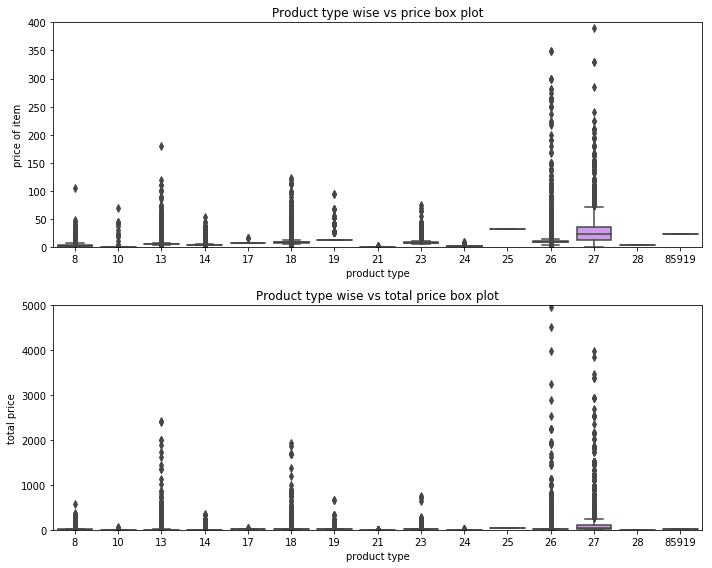

In [35]:
fig=plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.boxplot(x=dtl.prtype_idl,y=dtl.rprice)
plt.title("Product type wise vs price box plot")
plt.xlabel("product type")
plt.ylabel("price of item")
plt.ylim(0,400)


plt.subplot(2,1,2)
sns.boxplot(x=dtl.prtype_idl,y=dtl.total_price)
plt.title("Product type wise vs total price box plot")
plt.xlabel("product type")
plt.ylabel("total price")
plt.ylim(0,5000)
plt.tight_layout()
plt.savefig('price_boxplot')

In [36]:
grouped2=dtl.groupby('prod_idl').agg({'quantity':'sum'}).nlargest(columns=['quantity'],n=20)

In [37]:
grouped3=dtl.groupby('prod_idl').agg({'quantity':'sum','total_price':'sum'}).nlargest(columns=['total_price'],n=20)
grouped3

,quantity,total_price
prod_idl,,
178,25740,1365400.12
176,20303,734189.35
163,35085,580574.30
65,26437,359153.25
428,10166,301352.00
31,45152,213884.75
81,12918,178712.15
361,8863,161192.25
330,8427,136135.13


In [38]:
grouped4=dtl.groupby('prod_idl').agg({'quantity':'sum','total_price':'sum'}).nlargest(columns=['quantity'],n=20)
grouped4

,quantity,total_price
prod_idl,,
31,45152,213884.75
163,35085,580574.30
65,26437,359153.25
178,25740,1365400.12
176,20303,734189.35
110,18470,125252.52
242,17116,0.00
239,16642,78084.25
81,12918,178712.15


## product type and product item top 20 frequent items

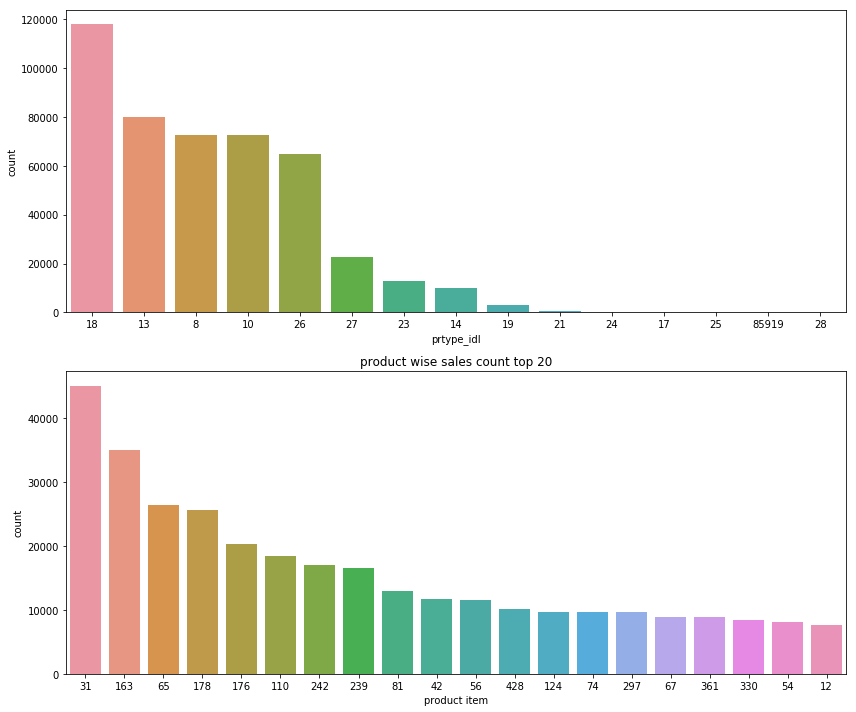

In [39]:
f, axes = plt.subplots(2, 1,figsize=(12,10))
sns.countplot(dtl['prtype_idl'],order=dtl.prtype_idl.value_counts().index,ax=axes[0])
plt.title("product type wise sales top 10")
plt.xlabel("product type")
plt.ylabel("count")

sns.barplot(x=grouped2.index,y='quantity',data=grouped2,order=grouped2.index,ax=axes[1])
plt.title("product wise sales count top 20")
plt.xlabel("product item")
plt.ylabel("count")
plt.tight_layout()

plt.savefig("countplot")


## Top 20 highest sales products

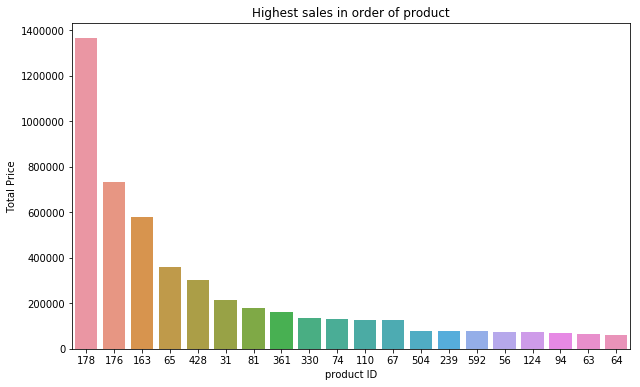

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x=grouped3.index,y='total_price',data=grouped3,order=grouped3.index)
plt.title("Highest sales in order of product")
plt.xlabel("product ID")
plt.ylabel("Total Price")
plt.savefig("descending_total_price")

In [41]:
from datetime import datetime

## Resampling of data according to day wise and taking sum of the total price per day

In [42]:
dtl_resampled=dtl.resample('D',how='sum')[['quantity','total_price']]
dtl_resampled.head()

/home/ummarshaik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


,quantity,total_price
dateorder,,
2016-03-06,923,9566.61
2016-03-07,699,5212.72
2016-03-08,608,4879.61
2016-03-09,470,3282.25
2016-03-10,517,3725.68


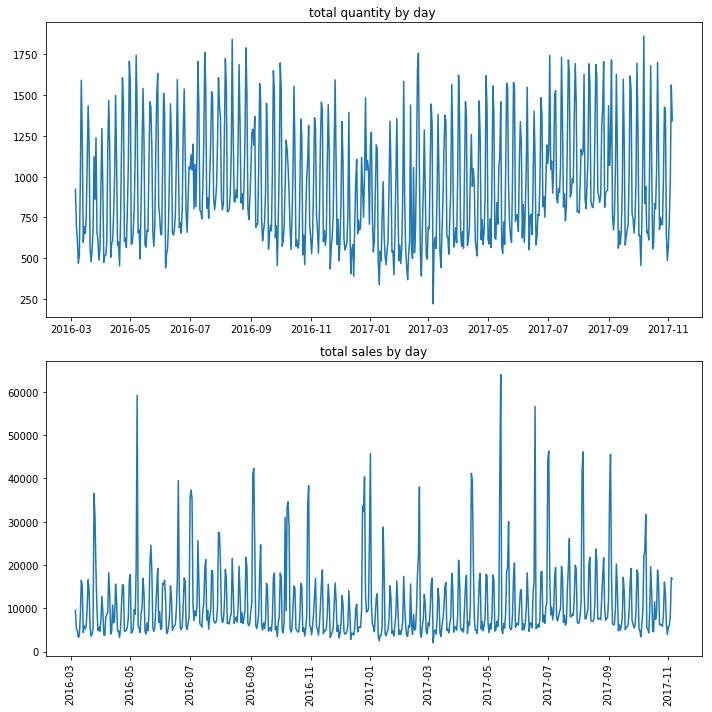

In [43]:
f, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,10))
ax1.plot(dtl_resampled['quantity'])
plt.xticks(rotation=90)
ax1.set_title('total quantity by day ')

ax2.plot(dtl_resampled['total_price'])
ax2.set_title('total sales by day')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig("Time Series of prices by day")

## Slicing of data for a year from 1st April 2016 to 31st march 2017

In [44]:
sliced_year=dtl_resampled.loc['2016-04-01':'2017-03-31',]

In [45]:
sliced_year.shape

(365, 2)

In [46]:
sliced_year=sliced_year.reset_index()

## month wise sales of the above sliced year

In [47]:
grouped_month=sliced_year.groupby(sliced_year.dateorder.dt.month).sum()
grouped_month
index=['Jan','Feb','March','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']


In [48]:
grouped_month.index= index

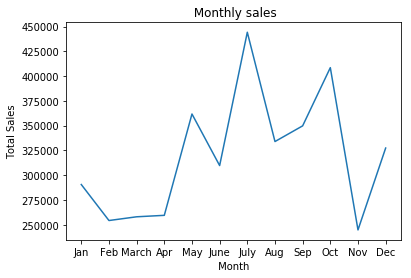

In [49]:
plt.plot(grouped_month['total_price'])
plt.title(" Monthly sales")
plt.xlabel(" Month ")
plt.ylabel("Total Sales")
plt.xticks()
plt.savefig("Mothly_sales")

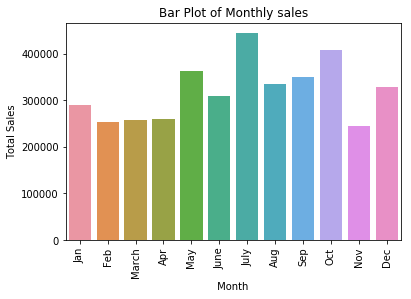

In [50]:
sns.barplot(x=grouped_month.index,y=grouped_month['total_price'],order=grouped_month.index)
plt.title("Bar Plot of Monthly sales")
plt.xlabel(" Month ")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.savefig("Mothly_sales")


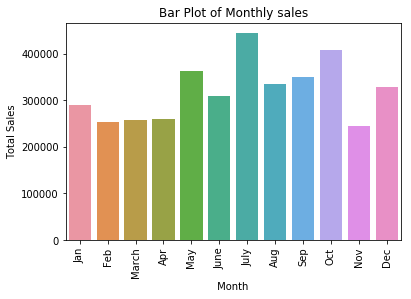

In [51]:
sns.barplot(x=grouped_month.index,y=grouped_month['total_price'])
plt.title("Bar Plot of Monthly sales")
plt.xlabel(" Month ")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.savefig("Mothly_sales")

In [52]:
hourly_dtl=dtl.resample('1H').agg({'quantity':'sum'})

In [53]:
hourly_dtl=hourly_dtl.reset_index()

In [54]:
hourly_dtl['Day']=hourly_dtl.dateorder.dt.weekday_name

In [55]:
hourly_dtl['hour']=hourly_dtl.dateorder.dt.hour

In [56]:
table=hourly_dtl.groupby(['hour','Day']).agg({'quantity':'sum'}).unstack()

In [57]:
table

quantity                                                  
Day    Friday Monday Saturday Sunday Thursday Tuesday Wednesday
hour                                                           
0           0      0        0      0        0       0         0
1           0      0        0      0        0       0         0
2           0      2        0      0        0       0         0
3           0      6        0      0        0       0         0
4           0      4        0      0        0       0         0
5           0      0        0      0        0       0         0
6           0      0        0      0        0       0         0
7           0      0        0      0        0       0         0
8           0      0        0      0        0       0         0
9           0      0       15      0        0       0         0
10          0     18     5874   5894        0       0         0
11       3381   3008     8752   9601     2742    2348      1910
12       9774   7664    10603  10466     7525    6512      6876
13       9100   7861    13006  12819     6677    6773      6538
14       6117   6177    12114  11433     4901    5112      4375
15       4333   4205     8869   8004     3556    4006      3279
16       3822   3521     6784   6227     3321    3294      2486
17       4993   3499     6162   5849     3440    3306      3324
18       8550   5315     9793   8596     6272    5501      5611
19      13532   7751    15029  11919     8883    7908      8484
20      15438   8873    15726  12196    10305    9014      9213
21      12339   5977    13257   7339     6753    5993      5712
22        899    203     1461    303      152     125        87
23          0      0        0      0        0       0         0

## Checking the which hours the people are visiting most , by days

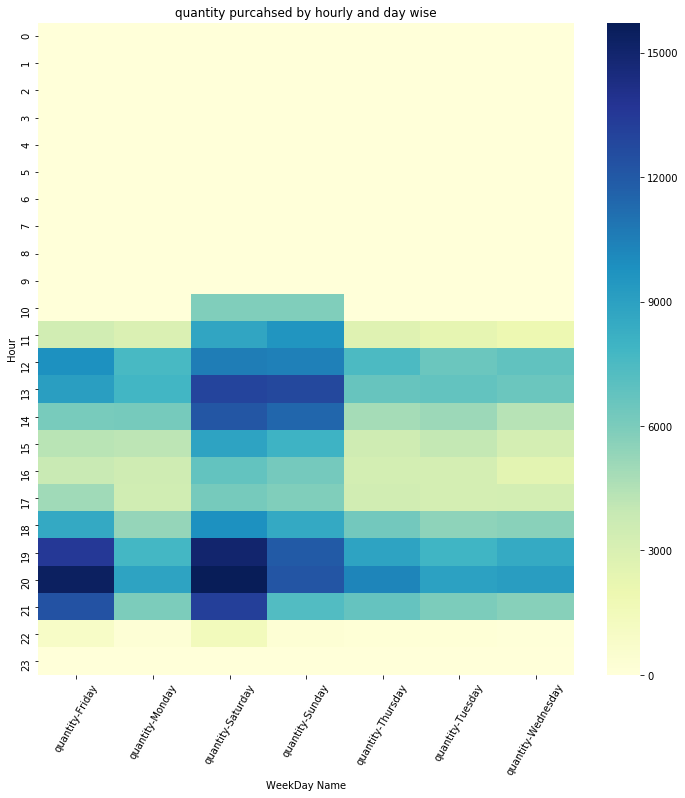

In [58]:
plt.figure(figsize=(12,12))
sns.heatmap(table,cmap="YlGnBu")
plt.title("quantity purcahsed by hourly and day wise")
plt.xlabel("WeekDay Name")
plt.ylabel("Hour")
plt.xticks(rotation=60)
plt.savefig("hourly and Day")